# Tiền xử lý dữ liệu

- Import lib

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

- Load dataset

In [2]:
df = pd.read_csv("../Dataset_Car/train-data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


- Xem thông tin dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


- Mô tả các cột có kiểu dữ liệu là kiểu số

In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


- Mô tả các cột có kiểu dữ liệu là kiểu object

In [5]:
df.describe(include="O")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


- Kiếm tra missing value

In [6]:
df.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

- Sau khi xem thấy cột index và new_price không cần thiết nên xóa nó đi

In [7]:
df.drop(columns=["Unnamed: 0","New_Price"] , inplace = True)

In [8]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

- Nhận thấy các cột Mileage, Power, Engine có dữ liệu và kiểu dữ liệu chưa phù hợp --> chuyến kiểu dữ liệu của các cột đó sang kiểu số, xóa bỏ đơn vị 

- Đổi cột Mileage & Engine & Power sang kiểu số

In [9]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [10]:
# Hàm chuyển đổi Mileage thành số
def convert_mileage_to_numeric(mileage):
    if isinstance(mileage, str):  # Kiểm tra nếu là chuỗi
        return float(mileage.split()[0])
    return mileage  # Trả lại giá trị nếu đã là float

# Apply the function to the 'Mileage' column
df['Mileage'] = df['Mileage'].apply(convert_mileage_to_numeric)
df['Mileage'] 

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

In [11]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [12]:
# Hàm chuyển đổi Engine thành số
def convert_engine_to_numeric(engine):
    if isinstance(engine, str):  # Kiểm tra nếu là chuỗi
        return float(engine.split()[0])
    return engine  # Trả lại giá trị nếu đã là float

df['Engine'] = df['Engine'].apply(convert_engine_to_numeric)
df['Engine'] 

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [13]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [14]:
def convert_power_to_numeric(power_str):
    if isinstance(power_str, str):
        try:
            return float(power_str.split()[0])
        except ValueError:
            return np.nan  
    else:
        return np.nan

df['Power'] = df['Power'].apply(convert_power_to_numeric)
df['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

In [15]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


- Trực quan hóa dữ liệu từng cột

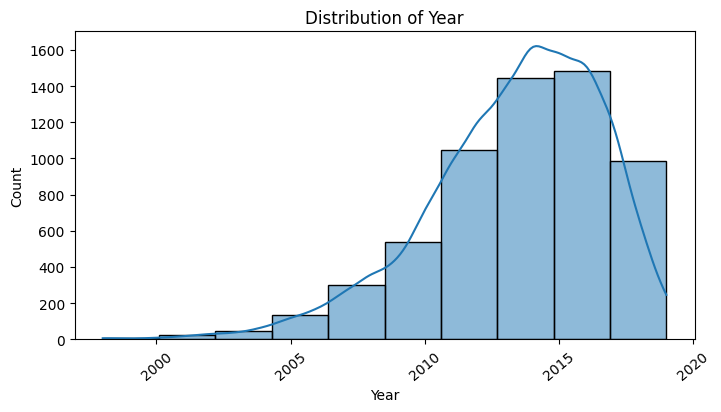

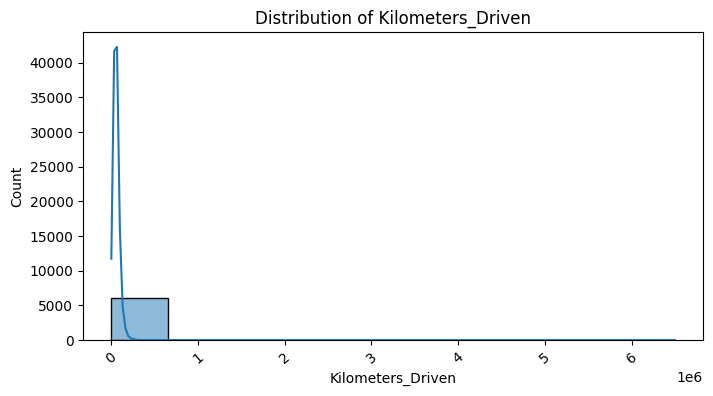

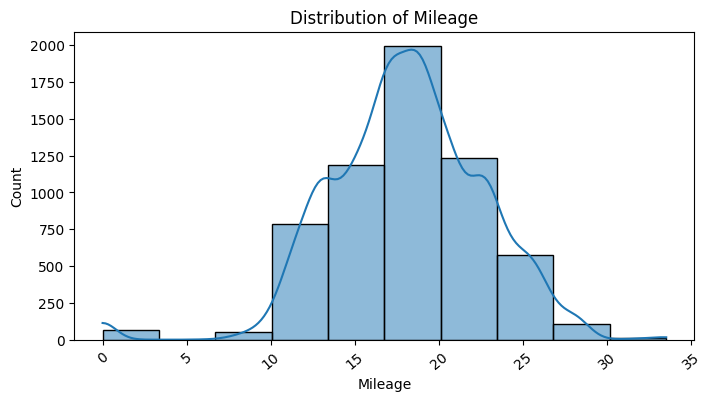

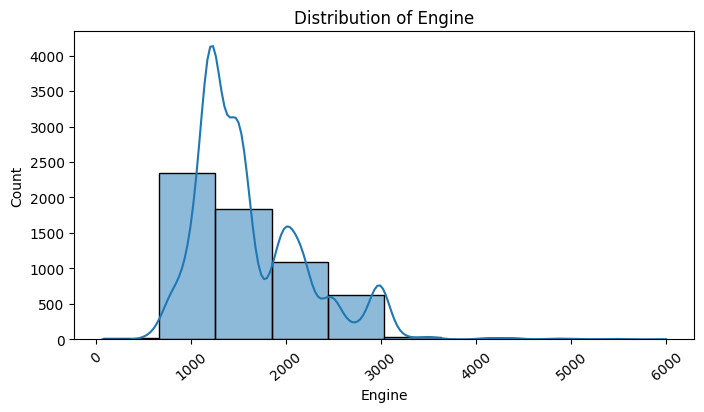

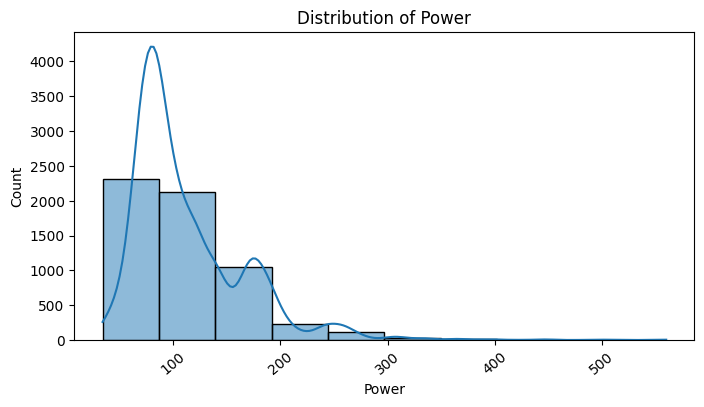

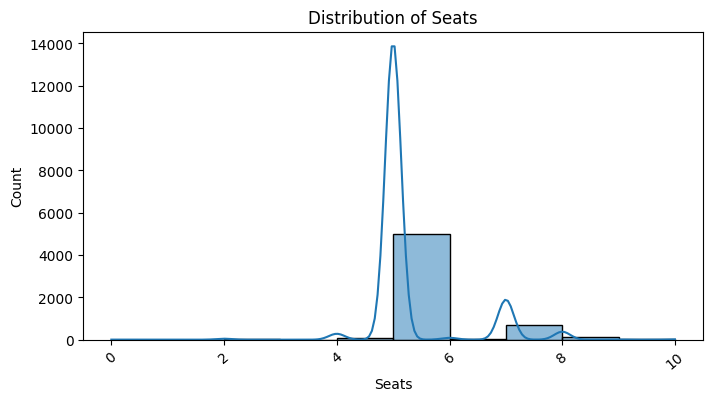

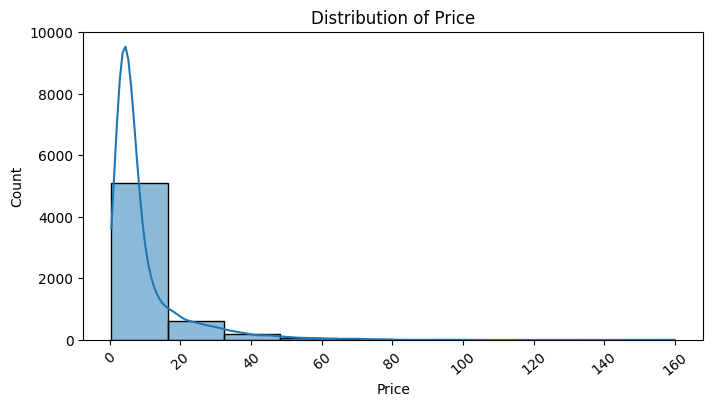

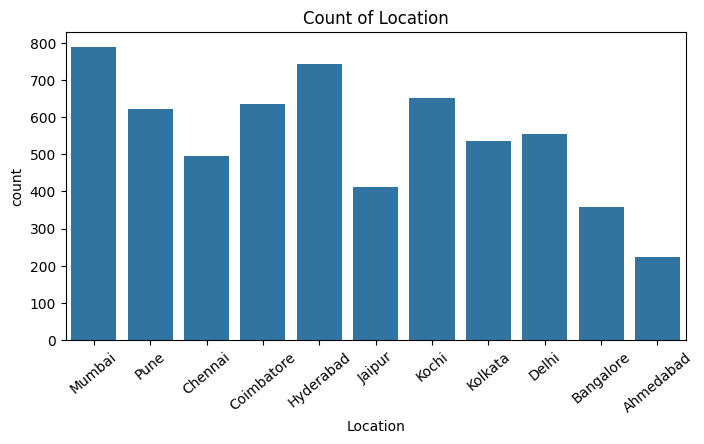

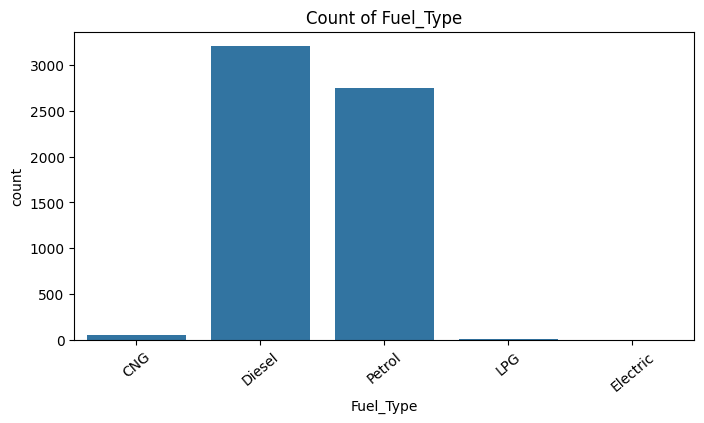

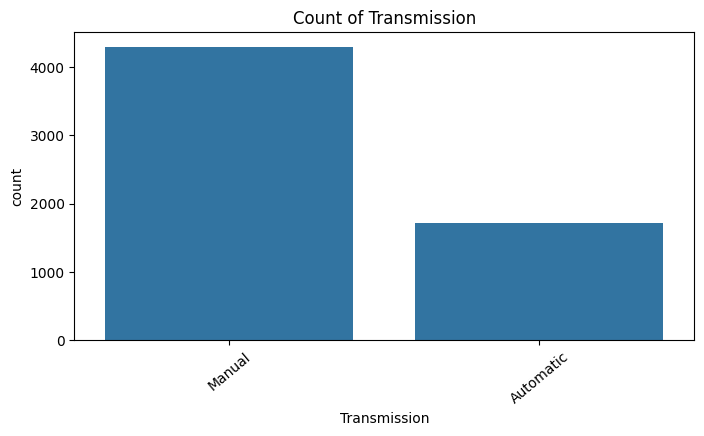

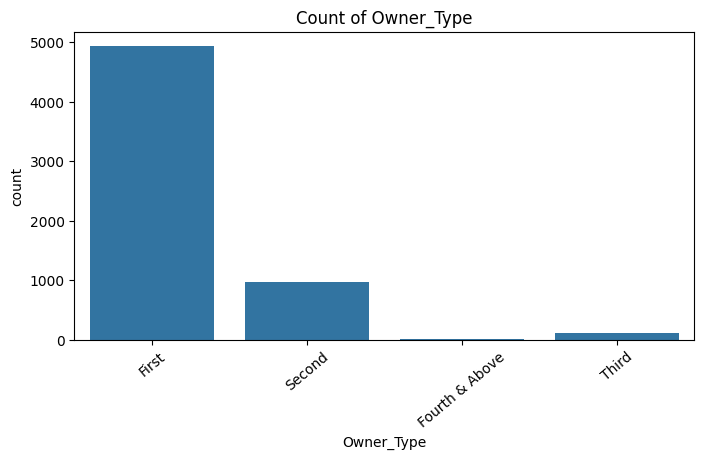

In [16]:
train_num = df.select_dtypes(include='number').columns.tolist()
train_cat = df.select_dtypes(include='object').columns.tolist()
train_cat = list(filter(lambda col: col != 'Name' , train_cat))

for column in train_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=40)
    plt.show()

for column in train_cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=40)
    plt.show()

In [17]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [18]:
pd.DataFrame({
    'Train Null Count': df.isna().sum(),
    'Train Null Ratio (%)': (df.isna().sum() / len(df)) * 100
})

,Train Null Count,Train Null Ratio (%)
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000
Transmission,0,0.000000
Owner_Type,0,0.000000
Mileage,2,0.033228
Engine,36,0.598106
Power,143,2.375810


- Theo quan sát, các cột bị khuyết là:
    - Mileage: 2 giá trị khuyết.
    - Engine: 36 giá trị khuyết.
    - Power: 143 giá trị khuyết.
    - Seats: 42 giá trị khuyết.

- Chọn phương pháp điền khuyết:
    - Mileage: Vì dữ liệu có phân phối gần chuẩn, có thể thay thế giá trị khuyết bằng giá trị trung bình của cột.
    - Engine: Vì dữ liệu lệch phải, sử dụng median.
    - Power: Tương tự cột Engine, do phân phối lệch phải nên median là lựa chọn tốt.
    - Seats:Sử dụng giá trị xuất hiện nhiều nhất (mode), vì đây thường là số ghế phổ biến nhất.

- Tiến hành điền khuyết

In [19]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2612\3135940402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2612\3135940402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [20]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [21]:
df['Seats'].astype(int)

0       5
1       5
2       5
3       7
4       5
       ..
6014    5
6015    5
6016    8
6017    5
6018    5
Name: Seats, Length: 6019, dtype: int32

# Feature Engineering

In [22]:
df["Price"] = df["Price"] * 1000

- Nhận thấy ở Name thì bao gồm tên thương hiệu và cả model nên tiến hành tạo cột mới từ cột Name

In [23]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df['Model'] = df['Name'].apply(lambda x: x.split()[1])

In [24]:
df['Brand'].nunique() , df['Brand'].unique()

(31,
 array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
        'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
        'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
        'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
        'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
        'Lamborghini'], dtype=object))

In [25]:
df['Model'].nunique() , df['Model'].unique()

(212,
 array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
        'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
        'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
        'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
        'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
        'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
        'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
        'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
        'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
        'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
        'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
        'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
        'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
        'Celerio', 'Sumo', 'Accord', '6', 'Manza'

In [26]:
df['Age'] = df['Age'] = pd.Timestamp.now().year - df['Year']
df['Age']

0       14
1        9
2       13
3       12
4       11
        ..
6014    10
6015     9
6016    12
6017    11
6018    13
Name: Age, Length: 6019, dtype: int64

In [27]:
df.drop(columns=["Name"] , inplace = True)

In [28]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1750.0,Maruti,Wagon,14
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12500.0,Hyundai,Creta,9
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4500.0,Honda,Jazz,13
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6000.0,Maruti,Ertiga,12
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17740.0,Audi,A4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4750.0,Maruti,Swift,10
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4000.0,Hyundai,Xcent,9
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2900.0,Mahindra,Xylo,12
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2650.0,Maruti,Wagon,11


In [29]:
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Age                  0
dtype: int64

In [30]:
df.to_csv('../Dataset_Car/train-data-clean.csv', index=False, encoding='utf-8')